# **Analyzing the Impact of Castle Doctrine Laws on Violent Crime Rates in the USA**

![fbi.jpg](fbi.jpg)
## **Introduction**

The **Castle Doctrine** is a legal principle that grants individuals the right to use reasonable force, including deadly force, to defend themselves against an intruder within their own homes. Rooted in the notion that one's home is their "castle," these laws eliminate the duty to retreat before using force in self-defense. Proponents argue that the Castle Doctrine empowers lawful homeowners to protect themselves and deters criminal activity, while critics express concerns that such laws may escalate violence and lead to an increase in homicides.

Understanding the **causal relationship** between the implementation of Castle Doctrine laws and changes in violent crime rates is crucial for policymakers, law enforcement agencies, and communities. By analyzing this relationship, we can assess whether these laws effectively reduce crime or inadvertently contribute to higher rates of violence.

## **Dataset Overview**

This analysis utilizes a comprehensive dataset from the **FBI**, encompassing various states over multiple years. The dataset captures a wide range of variables related to violent crimes, socioeconomic conditions, and demographic factors. Notably, the implementation of Castle Doctrine laws occurred at different times across states, with the majority adopting these statutes around **2006**. This staggered adoption provides a unique opportunity to employ robust methodologies to isolate the effect of these laws on violent crime rates.

### **Selected Columns for Analysis**

For a focused and meaningful analysis, we restrict our examination to the following columns from the dataset:

| **Column**         | **Description**                                                                                                                                                                                                                 |
|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `year`             | The calendar year of the observation (e.g., 2005, 2010).                                                                                                                                                                       |
| `post`             | A binary indicator where `1` signifies the post-treatment period (after the implementation of Castle Doctrine laws) and `0` denotes the pre-treatment period.                                                                    |
| `sid`              | The state identifier, uniquely representing each state in the dataset.                                                                                                                                                       |
| `homicide`         | The number of homicides recorded in the state per 100,000 population for the given year.                                                                                                                                       |
| `robbery`          | The number of robberies reported in the state per 100,000 population for the given year.                                                                                                                                        |
| `larceny`          | The number of larcenies recorded in the state per 100,000 population for the given year.                                                                                                                                        |
| `assault`          | The number of aggravated assaults reported in the state per 100,000 population for the given year.                                                                                                                              |
| `burglary`         | The number of burglaries recorded in the state per 100,000 population for the given year. 
| `l_exp_pubwelfare`         | Logged public welfare spending                                                                                                                                        |
| `l_police`         | Logged police presence                                                                                                                                        |
| `l_income`         | Logged income                                                                                                                                        |

| `murder`           | The number of murders reported in the state per 100,000 population for the given year.                                                                                                                                          |
| `unemployrt`       | The unemployment rate in the state for the given year, serving as an economic indicator.                                                                                                                                          |
| `poverty`          | The poverty rate in the state for the given year, reflecting socioeconomic conditions.                                                                                                                                           |
| `blackm_15_24`     | The percentage of Black males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `whitem_15_24`     | The percentage of White males aged 15-24 in the state for the given year.                                                                                                                                                        |
| `popwt`     | Population weight                                                                                                                                                                                                                       |

### **Crime Definitions**

To ensure clarity in our analysis, it's essential to define each of the key crime-related variables included in our dataset:

| **Variable**   | **Definition**                                                                                                                                                                                                                     |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Homicide**   | **Homicide** is defined as the sum of **murder** and **non-negligent manslaughter**. It represents the total number of intentional killings within a state, normalized per 100,000 state population.                                 |
| **Murder**     | **Murder** refers to the unlawful killing of another human being without justification or valid excuse, committed with the necessary intention as defined by the law in a specific jurisdiction.                                           |
| **Larceny**    | **Larceny** is the unlawful taking and carrying away of personal property with the intent to deprive the rightful owner of it permanently. It encompasses various forms of theft that do not involve force or intimidation.               |
| **Assault**    | **Assault** involves the act of causing physical harm or unwanted physical contact to another person. This includes aggravated assaults, which are more severe and may involve the use of weapons or intent to cause serious injury.       |
| **Burglary**   | **Burglary** is the act of illegally entering a building or other areas without permission, typically with the intention of committing a further criminal offense inside. It does not necessarily involve theft or violence.            |
| **Robbery**    | **Robbery** is the act of taking property or money from a person through force, intimidation, or threat of violence. Unlike larceny, robbery involves direct confrontation and coercion against the victim.                                |


### **Temporal and Spatial Dimensions**

The dataset spans multiple states across the United States and covers several years, allowing for a longitudinal analysis of crime trends in relation to the implementation of Castle Doctrine laws. Most states adopted these statutes around **2006**, but the exact year of implementation varies, providing a natural experiment setting to evaluate the laws' impact. By comparing states before and after the adoption period and against states that did not adopt the law during the study period, we can effectively employ different techniques to infer causality.

---



In [1]:
#Initialize the grader

import otter
grader = otter.Notebook()

In [2]:
#import as needed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc

!pip install statsmodels.api as sm
!pip install statsmodels.formula.api as smf

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement statsmodels.formula.api (from versions: none)
ERROR: No matching distribution found for statsmodels.formula.api

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dataset Exploration

**Question 0:** Load your dataset

In [3]:
# Import dataset
df = pd.read_csv("castle_doctrine_fbi.csv")

In [4]:
df

,Unnamed: 0,year,sid,post,homicide,murder,robbery,assault,burglary,larceny,l_exp_pubwelfare,l_police,l_income,unemployrt,poverty,blackm_15_24,whitem_15_24,popwt
0,0,2000,1,0,7.593978,6.532207,131.613570,325.61780,930.92017,2940.6238,6.926083,5.854609,10.711102,4.1,14.705981,2.222243,4.694810,4499293.0
1,1,2001,1,0,8.713443,7.494940,128.379600,281.63504,934.38460,2758.6900,6.974412,5.863135,10.675931,4.7,15.750203,2.249954,4.700201,4499293.0
2,2,2002,1,0,6.933288,6.406999,136.423310,274.63140,974.27570,2835.8290,7.038751,5.741382,10.727071,5.4,15.556559,2.258261,4.685461,4499293.0
3,3,2003,1,0,6.818007,6.567177,137.682700,258.53700,986.10266,2828.4238,7.110424,5.853816,10.695688,5.5,15.447802,2.292948,4.688166,4499293.0
4,4,2004,1,0,5.753689,5.595123,136.865310,255.65407,1011.78850,2800.9592,7.085519,5.792754,10.652069,5.1,16.252654,2.291327,4.661734,4499293.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,545,2006,51,0,2.524252,2.524252,13.980474,207.37703,450.87027,2381.9233,7.099053,5.890402,10.837029,3.2,10.044194,0.128737,7.068100,504780.2
546,546,2007,51,0,4.085253,4.085253,16.341013,206.79164,459.49374,2314.3933,7.129609,6.008737,10.844607,3.0,9.366708,0.138315,7.075853,504780.2
547,547,2008,51,0,2.295188,2.295188,16.448847,197.00363,420.78445,2216.3865,7.147602,5.961206,10.896961,3.2,9.460956,0.136181,6.962835,504780.2
548,548,2009,51,0,2.099441,2.099441,14.886945,178.45248,415.30760,2158.6070,7.220289,5.980045,10.884367,5.9,10.301384,0.147533,6.941324,504780.2


**Question 1:** 

a) Plot a correlation heatmap for this dataset using the selected_columns (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any 5 notable correlations. Based on these correlations, can you say that any of the correlations you suggested are causally related? If so, is their causal relationship direct or indirect, and are there any cofounding variables you suspect? Otherwise, explain why you weren't able to deduce any causal relaion.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

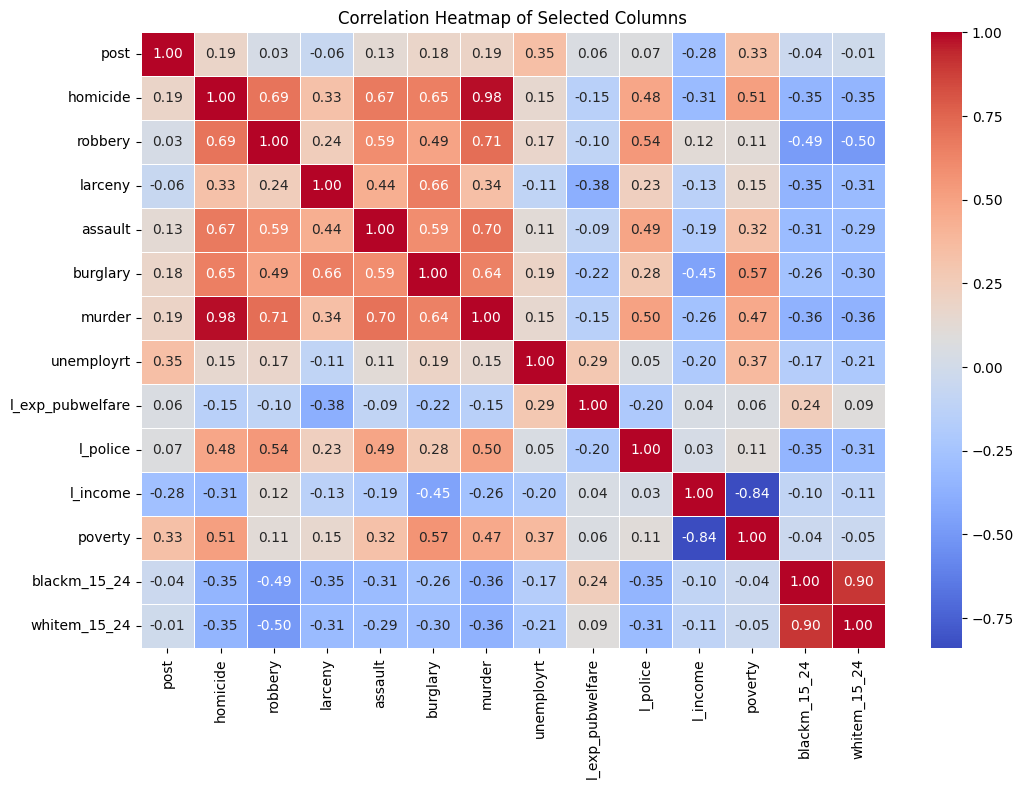

In [5]:
selected_columns = ['post', 'homicide', 'robbery', 'larceny', 
                    'assault', 'burglary', 'murder', 'unemployrt','l_exp_pubwelfare' ,'l_police','l_income',
                    'poverty', 'blackm_15_24', 'whitem_15_24']

#Plot correlation heatmap

selected = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

<span style="color:yellow"> Answer: </span>

1. Homicide and Murder - 0.98
This extremely high positive correlation (0.98) suggests that the variables homicide and murder are nearly interchangeable. This is expected since murder is a subset of homicides, and both represent violent crime rates.

2. Robbery and Homicide - 0.69
There is a strong positive correlation (0.69) between robbery and homicide. This suggests that states with higher robbery rates tend to have higher homicide rates. This relationship could indicate that regions experiencing more violent crimes like robbery also have high levels of lethal violence, i.e people who rob tend to kill or people who kill also rob things because as defined above robbery involves direct confrontation and intimidation. A similar corelation (0.71) follos with murder and robbery.
3. Larceny and Burglary (0.66)
The positive correlation (0.66) between larceny and burglary implies a significant overlap in trends between property crimes. States with high rates of burglary also tend to report high rates of larceny. Both crimes involve theft, which could indicate similar socioeconomic or enforcement factors influencing their rates.

4. L_income and Poverty (-0.84)
There is a strong negative correlation (-0.84) between l_income (logged income) and poverty. This is expected as higher income levels generally correlate with lower poverty rates. It highlights the economic disparity and suggests that regions with higher average incomes have lower rates of poverty

5. homicide and assault 0.67
The correlation between homicide and assault is 0.67, indicating a strong positive relationship. This makes sense because assault often involves the use of physical force or weapons, which can escalate into more severe violent crimes like homicide. High rates of assault could signal higher overall levels of violent behavior in a state, which may contribute to higher homicide rates as well. 

## **Analyzing the Impact of Castle Doctrine Laws on Homicide Rates**

We set out to analyze the impact of Castle Doctrine laws on homicide rates across different states in the United States. This investigation is particularly intriguing as it delves into the delicate balance between individual self-defense rights and broader public safety concerns. By examining whether the implementation of these laws correlates with changes in homicide rates, we aim to uncover insights that could inform policymakers and the community. However, we remain cautious, fully aware of the complexities involved in isolating the law's effect amidst a myriad of confounding factors. Despite these challenges, our analysis strives to navigate these intricacies to shed light on the implications of Castle Doctrine legislation.

**Question 2.1**:

Estimate the average treatment effect on **Homicide** before and after the doctrine was implemented using the **post** attribute in your dataset, without conditioning on any variable. Do you see any issues with this? Store your answe in the `ATE` variable

In [6]:
# copied from above 
# A binary indicator where `1` signifies the post-treatment period (after the implementation of Castle Doctrine laws) 
# and `0` denotes the pre-treatment period.   

In [7]:

ATE = df[df['post'] == 1]['homicide'].mean() - df[df['post'] == 0]['homicide'].mean()

In [8]:
grader.check('test_q2_1')

test_q2_1 results: All test cases passed!

**Question 2.2:** In case we were to assume this approach to capture the true causal effect is valid, test whether the difference in homicide rates in the instances of states where the doctrine was adopted is significant at a 5% significane level?

a) Calculate the p-value for the treatment and store it in `p_value`. 

b) Comment on the statistical significance of your result. What does this p-value say about homicide rates and the impact of the castle doctrine based on our assumptions? Clearly state your null and alternative hypotheses. Should you reject the null hypothesis?

**Note:** 
- Since we don't have an equal number of instances for the treatment and control, you have to sample the **latest** 50 instances from each set.
- You need to use an independent samples t-test, where your test statistic is the difference in means of the two groups.
- You need to assume variances of the two populations are not equal.
- You can use scipy for this part.

You can refer to this for further guidance, if needed: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

In [9]:
control_sample = df[df['post'] == 0]['homicide'].tail(50)
treatment_sample = df[df['post'] == 1]['homicide'].tail(50)

In [10]:
t_stat, p_value = sc.stats.ttest_ind(control_sample, treatment_sample, equal_var=False)
p_value

9.195806210348483e-08

In [11]:
grader.check('test_q2_2')

test_q2_2 results: All test cases passed!



<span style="color:yellow"> Answer: </span>
H0 (null) = There is no difference in the mean homicide rates between states that adopted the Castle Doctrine and those that did not.

H1 (alternative) = There is a significant difference in the mean homicide rates between states that adopted the Castle Doctrine and those that did not.

As p-value is less than 0.05, we reject the null hypothesis indicating that the difference in homicide rates between treated and control states is statistically significant.

**Question 3**:

a) Since our dataset comprises of data from many states, we aim to calculate the ATE across every state separately. 

-   Using only the states that eventually do implement the doctrine at some stage, 
-   Populate a **dataframe** containing the columns **sid**, **Pre_Treatment_Avg_Homicide**,**Post_Treatment_Avg_Homicide**, and **ATE_Homicide** to observe how the ATE for these states varies before and after they implement the doctrine. 
-   The dataframe must be sorted by the **sid**.
-   Store it in the `DF_CATE_STATE` variable 

b) Report the CATE. Store it in the `CATE` variable.

b) Do you observe any evidence for the **Simpson's Paradox** for any individual state? If so, why do you think this might be the case?

In [12]:
states_with_doctrine = df[df['post'] == 1]['sid'].unique()
filtered_df = df[df['sid'].isin(states_with_doctrine)]

In [13]:
DF_CATE_STATE = pd.DataFrame(columns=['sid','Pre_Treatment_Avg_Homicide','Post_Treatment_Avg_Homicide','ATE_Homicide'])




In [14]:
# Calculate the ATE for each state
for state in sorted(states_with_doctrine):
    state_data = filtered_df[filtered_df['sid'] == state]
    
    # Calculate Pre-Treatment and Post-Treatment average homicide rates
    pre_treatment_avg = state_data[state_data['post'] == 0]['homicide'].mean()
    post_treatment_avg = state_data[state_data['post'] == 1]['homicide'].mean()
    
    # Calculate the ATE for homicide
    ate_homicide = post_treatment_avg - pre_treatment_avg
    
    DF_CATE_STATE.loc[len(DF_CATE_STATE)] = [
    state,                # 'sid': state
    pre_treatment_avg,    # 'Pre_Treatment_Avg_Homicide': pre_treatment_avg
    post_treatment_avg,   # 'Post_Treatment_Avg_Homicide': post_treatment_avg
    ate_homicide          # 'ATE_Homicide': ate_homicide
]

# Sort the DataFrame by 'sid'
DF_CATE_STATE = DF_CATE_STATE.sort_values(by='sid').reset_index(drop=True)

# Store the result
print(DF_CATE_STATE)


     sid  Pre_Treatment_Avg_Homicide  Post_Treatment_Avg_Homicide  \
0    1.0                    7.461809                     7.239657   
1    2.0                    5.490787                     4.528263   
2    3.0                    7.665295                     7.133347   
3   10.0                    5.506912                     6.041792   
4   11.0                    7.240239                     6.608315   
5   15.0                    5.911693                     5.035126   
6   17.0                    4.383397                     4.012131   
7   18.0                    4.794723                     4.652908   
8   19.0                   12.569534                    12.583059   
9   23.0                    6.716056                     6.002740   
10  25.0                    8.888911                     7.176285   
11  26.0                    6.315173                     7.121179   
12  27.0                    2.944258                     2.642913   
13  35.0                    1.3529

In [15]:
CATE = DF_CATE_STATE.mean()
CATE = CATE[3]
CATE


C:\Users\sehar\AppData\Local\Temp\ipykernel_17448\1441313579.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CATE = CATE[3]


-0.20842067520786078

<span style="color:yellow"> Answer: </span>
for eg States 34 and 35 have positive ATE values, indicating an increase in homicide rates after the doctrine was implemented.This could be a case of Simpson's Paradox because, when aggregated, the combined data suggests a reduction in homicide rates (negative CATE). Yet, there are several individual states where the doctrine appears to have increased homicide rates. This contradiction indicates that the trend for individual states does not align with the overall trend when the data is aggregated.

This might be happening because are not taking account of time. Some states may have implemented the doctrine earlier than others, and external factors (e.g., changes in law enforcement strategies or economic conditions) could be influencing the results.


In [16]:
DF_CATE_STATE.tail(8)

,sid,Pre_Treatment_Avg_Homicide,Post_Treatment_Avg_Homicide,ATE_Homicide
13,35.0,1.352911,1.386991,0.034080
14,36.0,4.583821,4.353694,-0.230128
15,37.0,5.510655,5.960620,0.449966
16,41.0,7.720881,7.097260,-0.623622
17,42.0,1.886030,3.799240,1.913210
18,43.0,7.076934,6.655962,-0.420971
19,44.0,6.220406,5.455810,-0.764596
20,49.0,3.620422,3.996722,0.376300


In [17]:
grader.check('test_q3a')

test_q3a results: All test cases passed!

In [18]:
grader.check('test_q3b')

test_q3b results: All test cases passed!

**Question 4**:

So far, we have assumed that the trends in a single state won't vary across time, which might be an issue. Since the Castle Doctrine only begins to be implemented across states after 2006, we can assume restrict to our analysis to the year 2005 for pre-implementation, and 2010, for post-implementation of the Castle Doctrine. Repeat the experiment performed in the last question, but by controlling for time.

**a)**
-   Basing your analysis only on states that have implemented the doctrine in 2010,
-   Find the ATE for those states in 2010 (i.e. post treatment group) and 2005 (i.e. pre treatment group),
-   Populate a **dataframe** containing the columns **sid**, **Pre_Treatment_Avg_Homicide**,**Post_Treatment_Avg_Homicide**, and **ATE_Homicide** ,
-   Sort your dataframe using the **sid** column
-   Store it in the variable `DF_CATE_YEAR_STATE`

**b)**  Report the CATE. Store it in the variable `CATE_Y`

**c)**  Do you believe this is now a true meaure of causal effect of the doctrine on homicide? State any considerable assumptions we might be making.


In [19]:
filtered_df_years = filtered_df[filtered_df['year'].isin([2005, 2010])]

# Step 2: Identify the states that implemented the Castle Doctrine by 2010
states_with_doctrine_2010 = filtered_df_years[(filtered_df_years['post'] == 1) & (filtered_df_years['year'] == 2010)]['sid'].unique()

In [20]:
DF_CATE_STATE_YEAR = pd.DataFrame(columns=['sid','Pre_Treatment_Avg_Homicide','Post_Treatment_Avg_Homicide','ATE_Homicide'])
# CATE_Y = ?

In [21]:
for state in sorted(states_with_doctrine_2010):
    state_data = filtered_df_years[filtered_df_years['sid'] == state]
    
    # Calculate Pre-Treatment average homicide rate for 2005
    pre_treatment_avg = state_data[state_data['year'] == 2005]['homicide'].mean()
    
    # Calculate Post-Treatment average homicide rate for 2010
    post_treatment_avg = state_data[state_data['year'] == 2010]['homicide'].mean()
    
    # Calculate the ATE for homicide
    ate_homicide = post_treatment_avg - pre_treatment_avg
    
    # Add the results to the DataFrame
    DF_CATE_STATE_YEAR.loc[len(DF_CATE_STATE_YEAR)] = [
        state,                # 'sid': state
        pre_treatment_avg,    # 'Pre_Treatment_Avg_Homicide'
        post_treatment_avg,   # 'Post_Treatment_Avg_Homicide'
        ate_homicide          # 'ATE_Homicide'
    ]

In [22]:
DF_CATE_YEAR_STATE = DF_CATE_STATE_YEAR.sort_values(by='sid').reset_index(drop=True)

# Step 6: Calculate the CATE (Conditional Average Treatment Effect) for all states in 2010
CATE_Y = DF_CATE_YEAR_STATE['ATE_Homicide'].mean()

In [23]:
DF_CATE_STATE_YEAR.head(10)

,sid,Pre_Treatment_Avg_Homicide,Post_Treatment_Avg_Homicide,ATE_Homicide
0,1.0,8.418573,5.742760,-2.675813
1,2.0,4.986567,4.427856,-0.558711
2,3.0,7.633144,6.445258,-1.187886
3,10.0,5.079818,5.285303,0.205485
4,11.0,6.393730,5.804785,-0.588945
5,15.0,5.842414,4.521347,-1.321067
6,17.0,3.793262,3.529431,-0.263831
7,18.0,4.681379,4.330973,-0.350407
8,19.0,10.251161,11.357343,1.106182
9,23.0,6.375700,5.722250,-0.653450


In [24]:
print(CATE_Y)

-0.6419749809523808


In [25]:
grader.check('test_q4a')

test_q4a results: All test cases passed!

In [26]:
grader.check('test_q4b')

test_q4b results: All test cases passed!

<span style="color:yellow"> Answer: </span>
No, i dont think so. We are still making assumptions that in the absence of the Castle Doctrine, the trend in homicide rates would have been similar across states that implemented the doctrine and those that did not. If the states that adopted the doctrine had different underlying trends in homicide rates compared to states that did not adopt it, this could bias our results

Moreover,we are also assuming that no other exteranl cofounding factors influenced homicide rates, which might lead to bias in results. There might have been major policy changes or external events (e.g., changes in policing, economic crises) occurred between 2005 and 2010 that could have influenced the homicide rates independently of the doctrine


**Question 5**:

One of the fundamental Quasi-Experimental methods of measuring the ATE is the difference in difference approach. It allows us to effectively control for both:

1. **Time-Invariant Differences:** Any unobserved characteristics that do not change over time, such as cultural factors or baseline law enforcement practices.
2. **Common Temporal Trends:** Broader trends affecting all states, like economic shifts or national policy changes.


  Mathematically, the **Difference-in-Differences** estimator is expressed as:

  $DiD = (\overline{Y}_{\text{Post, Treated}} - \overline{Y}_{\text{Pre, Treated}}) - (\overline{Y}_{\text{Post, Control}} - \overline{Y}_{\text{Pre, Control}})$.


**a)** Plot an **overlaid line plot** of how the **mean of homicide rate** changes across time for states after and before implementing the doctrine. For reference to how your plot should look like, consult **plot.jpg** in your assignment folder.



**b)**  Report the ATE estimated using the DiD formula where:

-   Assume the pre-intervention period is 2005, while the post-intervention period is 2010,
-   Given **S** defines your set of all states, your treatment group **T** consists of the states that have implemented the doctrine in **2010**, and your control group are the states **S\T** in **2005** (i.e. the states apart from those incorporated in T)
-   Store your result in the `DiD_homicide` variable

**c)** Comment on the value of ATE obtained through DiD and the approach we used in the previous part. Which one do you believe is more robust to observing an association between homicide rates and the introdution of the Castle Doctrine?

In [27]:
df.columns

Index(['Unnamed: 0', 'year', 'sid', 'post', 'homicide', 'murder', 'robbery',
       'assault', 'burglary', 'larceny', 'l_exp_pubwelfare', 'l_police',
       'l_income', 'unemployrt', 'poverty', 'blackm_15_24', 'whitem_15_24',
       'popwt'],
      dtype='object')

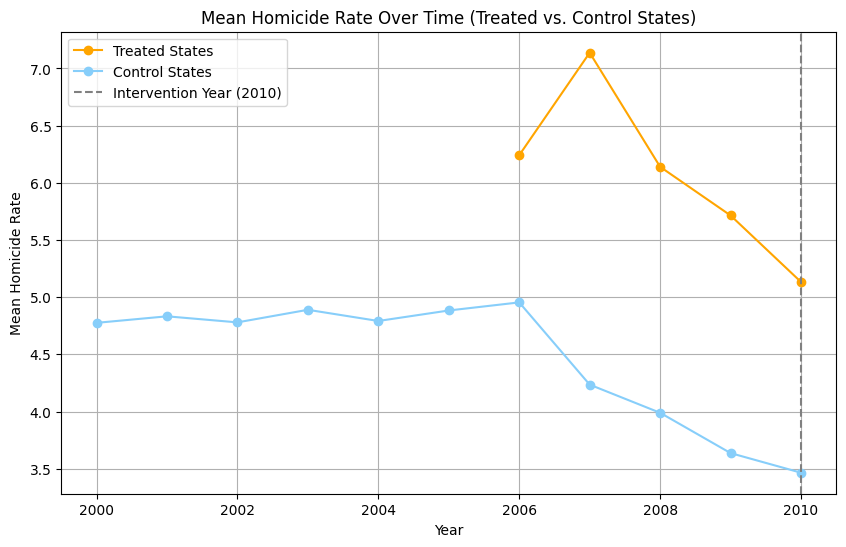

In [28]:

def plot_homicide_rate(data):
    # Calculate mean homicide rates for treatment and control groups over time
    mean_rates = data.groupby(['year', 'post'])['homicide'].mean().reset_index()

    # Split the data into post and control groups
    treated = mean_rates[mean_rates['post'] == 1]
    control = mean_rates[mean_rates['post'] == 0]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(treated['year'], treated['homicide'], label='Treated States', marker='o', color='orange')
    plt.plot(control['year'], control['homicide'], label='Control States', marker='o', color='lightskyblue')
    
    # Adding labels and legend
    plt.title('Mean Homicide Rate Over Time (Treated vs. Control States)')
    plt.xlabel('Year')
    plt.ylabel('Mean Homicide Rate')
    plt.axvline(x=2010, color='gray', linestyle='--', label='Intervention Year (2010)')
    plt.legend()
    plt.grid()
    plt.show()
    return treated,control
    

# Example usage
treated, control = plot_homicide_rate(data=df)

In [29]:


def calculate_did(data, col):
    # Define pre and post periods
    pre_period = 2005
    post_period = 2010

    # Create treatment and control groups
    treated = data[(data['post'] == 1) & (data['year'] == post_period)]['sid'].unique()
    control = data[~data['sid'].isin(treated)]['sid'].unique()

    # Calculate mean homicide rates for each group and period
    mean_pre_treated = data[(data['sid'].isin(treated)) & (data['year'] == pre_period)][col].mean()
    mean_post_treated = data[(data['sid'].isin(treated)) & (data['year'] == post_period)][col].mean()

    mean_pre_control = data[(data['sid'].isin(control)) & (data['year'] == pre_period)][col].mean()
    mean_post_control = data[(data['sid'].isin(control)) & (data['year'] == post_period)][col].mean()

    # Calculate the Difference-in-Differences estimate
    DiD = (mean_post_treated - mean_pre_treated) - (mean_post_control - mean_pre_control)

    return DiD


DiD_homicide = calculate_did(data=df, col ='homicide')
print(f"DiD: {DiD_homicide:.3f}")


DiD: 0.131


In [30]:
grader.check('test_q5')

test_q5 results: All test cases passed!

<span style="color:yellow"> Answer: </span>
In the previous question, the ATE estimated using the comparison of 2005 and 2010 directly showed a negative effect
−0.642 suggesting a reduction in homicide rates after the implementation of the Castle Doctrine. This analysis, however, did not account for broader temporal trends or unobserved characteristics that could differ between treated and control states.

The DiD method accounts for time-invariant differences between the treated and control states, as well as common temporal trends (e.g., national economic shifts), whic is why it is more robust. By differencing the changes in homicide rates, DiD helps control for confounding factors that might affect both treated and control states similarly, which the previous method could not account for.
The resulting DiD estimate 0.131 suggests a different association — an increase in homicide rates, rather than a decrease.



**Question 6:**

We generally hypothesize that the implementation of Castle Doctrine laws would lead to a decrease in violent crime rates, as these laws are intended to deter criminal activity by empowering individuals to defend themselves. To test this expectation, calculate the **Difference-in-Differences (DiD)** estimates for the following crime categories:

- **Murder**
- **Robbery**
- **Larceny**
- **Assault**

Using the same DiD formula as previously defined, perform the calculations for each of these crime types to assess whether the implementation of Castle Doctrine laws is associated with a significant change in their respective rates.


**Instructions:**

a) **Report the DiD Estimates:**
-  For each of the following crime categories (murder, robbery, larceny, assault), compute the DiD estimate using the approach used for homicide. Store your results in `DiD_robbery`, `DiD_larceny`, `DiD_assault`, and `DiD_murder` variables.

b) **Interpret the Results:**
   - Analyze whether the DiD estimates indicate a decrease in crime rates consistent with our intuition, and briefly discuss any discrepancies. Would you suggest implementing the law?


In [31]:
DiD_robbery = calculate_did(data=df, col ='robbery')
DiD_larceny = calculate_did(data=df, col ='larceny')
DiD_assault = calculate_did(data=df, col ='assault')
DiD_murder = calculate_did(data=df, col ='murder')

In [32]:

print(f"Difference-in-Differences (DiD) Estimate for Robbery: {DiD_robbery:.3f}")
print(f"Difference-in-Differences (DiD) Estimate for Larceny: {DiD_larceny:.3f}")
print(f"Difference-in-Differences (DiD) Estimate for Assault: {DiD_assault:.3f}")
print(f"Difference-in-Differences (DiD) Estimate for Murder: {DiD_murder:.3f}")


Difference-in-Differences (DiD) Estimate for Robbery: -2.583
Difference-in-Differences (DiD) Estimate for Larceny: -0.679
Difference-in-Differences (DiD) Estimate for Assault: -4.631
Difference-in-Differences (DiD) Estimate for Murder: 0.156


In [33]:
grader.check('test_q6')

test_q6 results: All test cases passed!

<span style="color:yellow"> Answer: </span>
(DiD) estimates for various crime categories show mixed results regarding the effectiveness of the Castle Doctrine. Robbery and larceny rates both decreased post-implementation, with robbery seeing a more substantial decline, suggesting the doctrine may deter crimes involving higher confrontation risks. Assault rates also dropped significantly, indicating the doctrine might reduce violent encounters. However, the slight increase in murder rates raises concerns, as it could reflect the unintended consequence of escalating confrontations to deadly levels. While the Castle Doctrine seems effective in reducing certain crimes, it is not effective on murder and homicide. The policy could be implemented to reduce robbery,assault and larceny but homicide and murder may require another treatment/law/policy




### **Lastly, just before we leave - let's test out another Quasi-Experimental Method of exploring causal relationships: *Multivariate Regression*!**

**Good News: Understanding that the workload at this stage of the semester is statistically significant, I’ve gone ahead and provided the code you’ll need to perform this regression 😊.**

Multivariate regression will help us understand whether the Castle Doctrine law truly impacts homicide rates, by isolating the effect of the law from several other covariates e.g. economic and policy influences.

### **Background**

In this model, we include **multiple control variables** such as economic indicators (e.g., unemployment rate, poverty rate) and policy-related factors (e.g., police presence in a state) to account for their potential influence on homicide rates. This allows us to **better isolate the causal impact** of the Castle Doctrine law. Here’s the general form of the regression model for this case based on literature:

**$\text{Outcome}_{it} = \beta_0 + \beta_1 \times \text{CDL}_{it} + \beta_2 \times X_{it} + \alpha_i + \lambda_t + \epsilon_{it}$**

where:
- $\text{Outcome}_{it}$: the crime outcome variable, in this case the homicide rate, for state $i$ at time $t$.
- $\text{CDL}_{it}$: the treatment variable, representing the Castle Doctrine law (set to 1 if the law is in effect in state $i$ during time $t$; 0 otherwise).
- $X_{it}$: a vector of control variables, such as unemployment rate, poverty rate, logged income, police presence, and welfare spending.
- $\alpha_i$: state fixed effects to control for differences across states that do not change over time.
- $\lambda_t$: year fixed effects to control for national trends that affect all states equally in each year.
- $\epsilon_{it}$: error term.

### **Objective**

By running this regression, we aim to isolate the effect of the Castle Doctrine law on homicide rates, holding all other factors constant. This approach is more robust than simpler comparisons, as it **controls for multiple potential confounding factors** and focuses on within-state changes over time, not just across states.

### **Question and Instructions**

1. **Run the Provided Code:** Execute the code provided to run this multivariate regression model on the dataset.

2. **Interpret the Results**: Based on the output:

    **a) Examine the coefficient for `post` (our treatment variable) to determine the effect of the Castle Doctrine law on homicide rates. How does it compare with our earlier estimate using the DiD approach?**   

    **b) Is the coefficient for `post` statistically significant at the 5% level? What does this tell you about the impact of the law on homicide rates?**

    **c) How do the control variables of unemployment rate, poverty, and police presence impact our outcome variable?**

    **d) Could there still be any limitations with the approach that we've used? **Hint**: Does the OLS model we are using for regression necessarily capture the underlying distribution?**

---

By completing this section, you'll gain insight into how multivariate regression helps isolate causal effects by controlling for multiple influences in a single model, giving you a deeper understanding of the policy's true impact on crime outcomes.



In [34]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import statsmodels.formula.api as smf

data = df

# Our control variables 
control_vars = ['unemployrt', 'poverty', 'l_income', 'l_exp_pubwelfare', 'l_police']
controls = ' + '.join(control_vars)

# The OLS model we're using for regression. We use cluster standards error to better adjust for potential within-state correlations.
formula = f'homicide ~ post + {controls} + C(sid) + C(year)'
model = smf.ols(formula=formula, data=data).fit(cov_type='cluster', cov_kwds={'groups': data['sid']})

# Use this summary for your interpretations
display(model.summary())

C:\Users\sehar\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 65, but rank is 16
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               homicide   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     265.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.82e-42
Time:                        18:40:16   Log-Likelihood:                -533.33
No. Observations:                 550   AIC:                             1199.
Df Residuals:                     484   BIC:                             1483.
Df Model:                          65                                         
Covariance Type:              cluster                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7559     13.270     -0.208      0.835     -28.765      23.253
C(sid)[T.2]         -2.8648      0.577     -4.961      0.000      -3.997      -1.733
C(sid)[T.3]         -0.0666      0.191     -0.348      0.728      -0.442       0.309
C(sid)[T.4]         -0.9296      0.197     -4.709      0.000      -1.317      -0.543
C(sid)[T.5]         -1.2519      0.372     -3.364      0.001      -1.981      -0.522
C(sid)[T.6]         -4.1867      0.530     -7.904      0.000      -5.225      -3.149
C(sid)[T.7]         -4.7908      0.597     -8.027      0.000      -5.961      -3.621
C(sid)[T.8]         -3.7973      0.451     -8.428      0.000      -4.680      -2.914
C(sid)[T.10]        -1.8572      0.299     -6.217      0.000      -2.443      -1.272
C(sid)[T.11]        -0.5133      0.208     -2.470      0.014      -0.921      -0.106
C(sid)[T.12]        -5.8375      0.516    -11.320      0.000      -6.848      -4.827
C(sid)[T.13]        -5.3651      0.293    -18.331      0.000      -5.939      -4.791
C(sid)[T.14]        -1.1022      0.379     -2.909      0.004      -1.845      -0.359
C(sid)[T.15]        -1.9371      0.348     -5.569      0.000      -2.619      -1.255
C(sid)[T.16]        -6.1190      0.405    -15.115      0.000      -6.912      -5.325
C(sid)[T.17]        -3.5177      0.398     -8.848      0.000      -4.297      -2.738
C(sid)[T.18]        -2.4976      0.271     -9.224      0.000      -3.028      -1.967
C(sid)[T.19]         5.2024      0.209     24.855      0.000       4.792       5.613
C(sid)[T.20]        -6.0877      0.457    -13.321      0.000      -6.983      -5.192
C(sid)[T.21]         0.9599      0.637      1.506      0.132      -0.289       2.209
C(sid)[T.22]        -5.3160      0.495    -10.738      0.000      -6.286      -4.346
C(sid)[T.23]        -0.9204      0.332     -2.769      0.006      -1.572      -0.269
C(sid)[T.24]        -5.7067      0.542    -10.531      0.000      -6.769      -4.645
C(sid)[T.25]         1.2338      0.402      3.066      0.002       0.445       2.022
C(sid)[T.26]        -1.0548      0.260     -4.064      0.000      -1.564      -0.546
C(sid)[T.27]        -4.4926      0.178    -25.198      0.000      -4.842      -4.143
C(sid)[T.28]        -4.7644      0.393    -12.138      0.000      -5.534      -3.995
C(sid)[T.29]         0.2027      0.613      0.331      0.741      -0.998       1.403
C(sid)[T.30]        -6.7903      0.703     -9.662      0.000      -8.168      -5.413
C(sid)[T.31]        -3.8306      0.658     -5.821      0.000      -5.121      -2.541
C(sid)[T.32]         0.4913      0.307      1.599      0.110      -0.111       1.093
C(sid)[T.33]        -3.2685      0.446     -7.333      0.000      -4.142      -2.395
C(sid)[T.34]        -1.0630      0.174     -6.102      0.000      -1.404      -0.722
C(sid)[T.35]        -6.

Answr:
The coefficient for post is 0.1402, with a p-value of 0.495, which is not statistically significant at the 5% level. This suggests that the implementation of the Castle Doctrine law does not have a statistically significant effect on homicide rates.

### By now, all I hope is that you realize…

As you've worked through this assignment, I hope you've developed an appreciation for the complexities involved in establishing causality. Causal inference isn’t straightforward; it requires careful attention to assumptions, rigorous control of confounding factors, and a deep understanding of what the data can truly tell us. Each method we explored, from Difference-in-Differences to Multivariate Regression, required us to think critically about the limitations and nuances of our approach.

It's also important to note that the purpose of this dataset wasn’t to definitively justify or refute any policy’s effects. True causal analysis would require even deeper data exploration, consideration of additional factors, and careful external validation. What we've done here is just the beginning—a simplified view of a much more complex process.

As you approach real-world data problems, remember that establishing causality demands more than just statistical techniques. It requires a combination of domain knowledge, critical thinking, and a commitment to exploring and questioning the data from all angles. 

Congratulations on making it this far, and welcome to the world of careful, thoughtful data analysis! 🎉


# Fin